In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

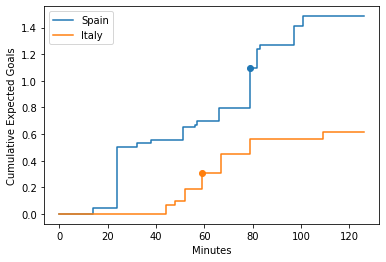

In [2]:
#output_filename = "xG_plot"

with open("data/5111408/5111408_events.json") as f:
    data = json.load(f)

events = data["events"]

team_current_score = {}

team_shot_x_points = {}
team_shot_y_points = {}

team_goal_x_points = {}
team_goal_y_points = {}

team_meta = {}

end = 0

for event in events:
    end = event["minute"]

    if event["type"]["primary"] != "shot":
        continue
    team_id = event["team"]["id"]
    team_meta[team_id] = event["team"]
    shot = event["shot"]
    old_score = team_current_score.get(team_id, 0)

    team_shot_x_points.setdefault(team_id, []).append(event["minute"])
    team_shot_y_points.setdefault(team_id, []).append(old_score)

    # Increment score
    xg = shot["xg"]
    team_current_score[team_id] = old_score + xg

    team_shot_x_points.setdefault(team_id, []).append(event["minute"])
    team_shot_y_points.setdefault(team_id, []).append(old_score + xg)

    if shot["isGoal"]:
        team_goal_x_points.setdefault(team_id, []).append(event["minute"])
        team_goal_y_points.setdefault(team_id, []).append(old_score + xg)


fig, ax = plt.subplots()
for team, points in team_shot_x_points.items():
    meta = team_meta[team]
    end_score = team_current_score[team]

    ax.plot(
        [0] + points + [end],
        [0] + team_shot_y_points.get(team, []) + [end_score],
        label=meta["name"],
    )

    if team in team_goal_x_points:
        ax.scatter(
            team_goal_x_points[team],
            team_goal_y_points[team],
            marker="o",
        )

ax.set_ylabel("Cumulative Expected Goals")
ax.set_xlabel("Minutes")
ax.legend()

#fig.savefig(output_filename)
